In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import threading
import urllib.request
import time
import random
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import neighbors, datasets, metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
# importando o dataset
df = pd.read_csv('doencas_coracao.csv')

In [3]:
# verificar as primeiras linhas do Data Frame
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# vefiricando as infos do Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# idade media dos pacientes que faleceram
df.loc[df['DEATH_EVENT'] == 1]['age'].mean()

65.21528124999999

In [6]:
# pacientes que faleceram e do sexo feminimo
len(df.loc[(df['DEATH_EVENT'] == 0) & (df['sex'] == 0)])

71

In [7]:
# definindo os dados de entrada e saida
entradas = df[['sex', 'age', 'diabetes', 'anaemia', 'high_blood_pressure', 'creatinine_phosphokinase', 'smoking', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time', 'serum_sodium']]
saida = df[['DEATH_EVENT']]

In [8]:
# verificando os dados de entrada e saida
entradas.head()
saida.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [9]:
# normalizacao dos dados
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas = normaliza.fit_transform(entradas)

In [10]:
# dividindo os dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas, saida,test_size=0.30,random_state=42)

## Algoritmo KNN




In [11]:
# criando o objeto de classificação
clf_KNN = KNeighborsClassifier(n_neighbors=5)

# treinamento o modelo
clf_KNN.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_KNN.predict(x_test)

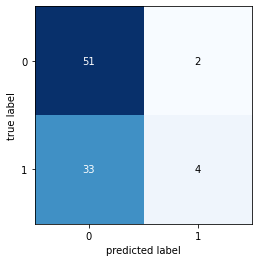

Acuracia do Modelo:  0.6111111111111112


In [12]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Algoritmo Arvore de Decisão

In [13]:
# criando o objeto de classificação
clf_arvore = DecisionTreeClassifier(random_state = 1)

# treinamento o modelo
clf_arvore.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_arvore.predict(x_test)

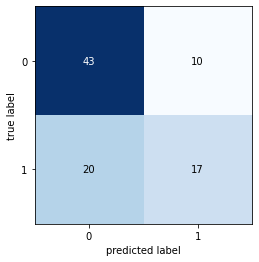

Acuracia do Modelo:  0.6666666666666666


In [14]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Algoritmo Rede MLP

In [15]:
# criando o objeto de classificação
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,10), random_state=1)

# treinamento o modelo
clf_mlp.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_mlp.predict(x_test)

/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


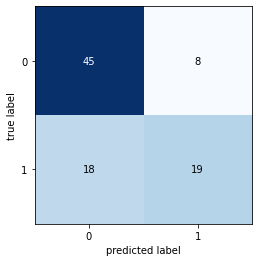

Acuracia do Modelo:  0.7111111111111111


In [16]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Threads

In [29]:
# Processamento Sequencial - questão 7
def contador():
  print('Chamou')
  x = 1000000000
  while x > 0:
    x -= 1

def imple_sequencial():
  t0 = time.time()
  contador()
  contador()
  t1 = time.time()
  totaltime = t1 - t0
  print('\nTempo total da execução Sequencial: ', totaltime)

def imple_concorrente():
  t0 = time.time()
  thread1 = threading.Thread(target = contador)
  thread2 = threading.Thread(target = contador)
  
   # inicia as threads
  thread2.start()
  thread1.start() 

  # garante a execução das threads
  thread1.join()
  thread2.join()

  t1 = time.time()
  totaltime = t1 - t0
  print('\nTempo total da execução Concorrente: ', totaltime)

imple_sequencial()
imple_concorrente()

Chamou
Chamou

Tempo total da execução Sequencial:  84.82612013816833
Chamou
Chamou

Tempo total da execução Concorrente:  100.99183440208435


In [30]:
# Processamento Sequencial - questão 8
def contador():
  print('Chamou')
  x = 1000000000
  while x > 0:
    x -= 1

def imple_sequencial():
  t0 = time.time()
  contador()
  contador()
  t1 = time.time()
  totaltime = t1 - t0
  print('Tempo total da execução Sequencial: ', totaltime)

def imple_concorrente():
  t0 = time.time()
  thread1 = threading.Thread(target = contador)
  time.sleep(random.randint(1,2))
  thread2 = threading.Thread(target = contador)
  time.sleep(random.randint(1,2))
  

  # inicia as threads
  thread2.start()
  thread1.start() 

  # garante a execução das threads
  thread1.join()
  thread2.join()
  
  t1 = time.time()

  totaltime = t1 - t0
  print('Tempo total da execução Concorrente: ', totaltime)

imple_sequencial()
imple_concorrente()

Chamou
Chamou
Tempo total da execução Sequencial:  90.41874599456787
Chamou
Chamou
Tempo total da execução Concorrente:  94.39509582519531


## Programação Reativa

In [41]:
import rx
import rx.operators as ops

# Questão 9
source = rx.from_iterable([5,4,3,2,1]) #streaming
disposable = source.pipe(
    ops.filter(lambda i:i%2==0),
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e:print("on_error: {}".format(e))
) #inscrição do observer

disposable.dispose()
print('Fim')

on_next: 4
on_next: 2
on_completed
Fim


In [36]:
import rx
import rx.operators as ops

# Questão 10
source = rx.from_iterable([5,4,3,2,1]) #streaming
disposable = source.pipe(
    ops.map(lambda i:i if i < 3 else 0),
    ops.filter(lambda i:i > 0),
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e:print("on_error: {}".format(e))
) #inscrição do observer

disposable.dispose()
print('Fim')

on_next: 2
on_next: 1
on_completed
Fim


In [37]:
import rx
import rx.operators as ops

# Questão 11
source = rx.from_iterable([5,4,3,"2",1]) #streaming
disposable = source.pipe(
    ops.filter(lambda i:i%2==0),
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e:print("on_error: {}".format(e))
) #inscrição do observer

disposable.dispose()
print('Fim')

on_next: 4
on_error: not all arguments converted during string formatting
Fim


## PyGames

In [3]:
# Questão 12

# coding: iso-8859-1 -*-
import pygame
from pygame.locals import *
from sys import exit

pygame.init()

screen = pygame.display.set_mode((720, 640))
pygame.display.set_caption('Desafio Modulo 04')

while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        
        screen.fill((255,0,255))

        x, y = pygame.mouse.get_pos()

        print(x,y)

    pygame.display.update()

397 96
397 96
397 96
397 96
397 96
397 96
397 96
397 96
397 96
397 96
397 96
388 94
350 87
296 77
234 69
152 63
86 63
20 69
0 79
0 79
2 77
2 77
8 77
13 77
17 77
20 77
22 77
19 76
15 75
12 74
8 73
4 73
0 71
0 71
12 75
12 75
55 75
55 75
79 75
103 75
123 75
145 75
160 75
169 75
177 75
183 75
185 76
183 76
179 76
171 76
159 76
142 80
122 80
105 80
87 80
63 80
37 80
17 76
0 76
0 76
3 90
3 90
36 94
36 94
53 96
69 98
85 98
99 98
112 100
117 100
120 101
119 101
115 100
107 100
99 100
87 98
75 97
61 95
43 93
28 90
14 88
1 88
0 86
0 86
6 95
6 95
28 96
48 100
67 102
87 106
106 108
130 110
150 110
170 110
180 110
188 110
190 110
192 111
190 111
186 111
175 110
156 108
141 104
128 103
105 99
85 93
61 89
39 85
22 81
5 77
0 74
0 74
2 79
2 79
14 81
28 83
43 87
83 91
113 95
139 97
161 99
181 101
191 101
198 101
200 101
198 101
196 101
192 101
181 101
174 100
163 97
144 97
120 93
96 87
70 83
42 79
18 71
0 69
0 69
333 1
333 1
337 2
341 3
342 5
344 5
346 6
348 6
358 8
381 8
417 10
453 10
499 6
541 4
579 0

SystemExit: 

In [6]:
# Questão 13

# coding: iso-8859-1 -*-
import pygame
from pygame.locals import *
from sys import exit

pygame.init()

screen = pygame.display.set_mode((720, 640))
pygame.display.set_caption('Desafio Modulo 04')

while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
                
        screen.fill((255,0,255))
        print(event.type == KEYDOWN)
        
        x, y = pygame.mouse.get_pos()

        print(x,y)

    pygame.display.update()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
True
False
False
True
False
False
True
False
False
True
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


SystemExit: 

In [14]:
# Questão 14

# coding: iso-8859-1 -*-
import pygame
from pygame.locals import *
from sys import exit

pygame.init()

screen = pygame.display.set_mode((720, 640))
pygame.display.set_caption('Desafio Modulo 04')

while True:
    
    pygame.draw.rect(screen, (255,0,0), [360,320,10,10])
    
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        
        screen.fill((255,0,255))

        x, y = pygame.mouse.get_pos()        

    pygame.display.update()

SystemExit: 

In [1]:
# Questão 15

# coding: iso-8859-1 -*-
import pygame
from pygame.locals import *
from sys import exit

pygame.init()

screen = pygame.display.set_mode((720, 640))
pygame.display.set_caption('Desafio Modulo 04')

while True:
    
    pygame.draw.rect(screen, (255,0,0), [360,320,10,10])
    
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        
        if event.type == KEYDOWN:
            print(event.key)

        screen.fill((255,0,255))

        x, y = pygame.mouse.get_pos()        

    pygame.display.update()

108
108
111
1073741904
1073741903
1073741906
1073741905
1073741905
1073741905
1073741905
1073741905


SystemExit: 